<a href="https://colab.research.google.com/github/meghamkpatel/INFO6105/blob/main/Assignment/Zomato_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Sci Eng Methods 
## Assignment 1 – Zomato_EDA

*ML Data Cleaning and Feature Selection*


PLAN:
* remove restaurant name
* get top 5 cuisines, type, location, rest_type
* normalize online order and booking
* map out heat map, pair plot, and box plot
* check for colinearity
* get original data where rating is blank and use that as testing data
* Write out answers clearly and explain what you are doing
* Remove outliers and test model



# Abstract

Zomato is an Indian multinational restaurant aggregator and food delivery company. 
Zomato provides information, menus and user-reviews of restaurants as well as food delivery options from partner restaurants in select cities. 
This dataset is comprised of information of food restraunts in Banglaore working with Zomato.
The aim of the Notebook is to check the quality of the data and determine which features are important. The notebook has used statistical methods like p-value, t-statistics and visualization techniques like histogram, Q-Q plot, scatter plot, box-plot of python's matplotlib and seaborn library to answer below questions about the dataset
<br>•	Which independent variables are useful to predict a target (dependent variable)?
<br>•	Which independent variables have missing data? How much
<br>•	Do the training and test sets have the same data?
<br>•	In the predictor variables independent of all the other predictor variables?
<br>•	Which predictor variables are the most important?
<br>•	Do the ranges of the predictor variables make sense?
<br>•	What are the distributions of the predictor variables?

<br>The dataset contains inconsistant values and missing data so it will require cleaning up. The significance of the predictors is investigated and it appears that of the 16 independent variables,  9 are significant, these results can be used to further optimize the model for predicting the best restaurants depending on a customer's need.
   


_________________________________________________________
###Getting our data

In [2]:
#installing dependencies
!pip install eli5
! pip install -q kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 2.1 MB/s 
     |████████████████████████████████| 133 kB 37.8 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=6fbefabcc3d7419dff11f424deea823be25f90547f362c3105900d8099c54659
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [3]:
#making a directory for kaggle api
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

Saving kaggle.json to kaggle.json


In [4]:
#downloading and reading the zomato dataset
! kaggle datasets list -s zomato
! kaggle datasets download -d pranavuikey/zomato-eda
!unzip zomato-eda.zip
data = pd.read_csv("zomato.csv")

ref                                                          title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
himanshupoddar/zomato-bangalore-restaurants                  Zomato Bangalore Restaurants                        89MB  2019-03-31 09:48:43          45159       1151  1.0              
shrutimehta/zomato-restaurants-data                          Zomato Restaurants Data                              5MB  2018-03-13 04:56:25          43694        610  0.7941176        
batjoker/zomato-restaurants-hyderabad                        Zomato Restaurants Hyderabad                         1MB  2020-06-08 15:11:39           3063         62  1.0              
phiitm/chennai-zomato-restaurants-data                       Chennai Zomato Rest

In [5]:
#Viewing data in the file 
data.shape
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


**What are the data types? (Only numeric and categorical)**

# Data Set
The data set consists of :
1. Types: categorical
2. Rating - numeric (The dependent variable)
3. Votes - numeric
4. Online order - categorical
6. Book table - categorical
7. Location - categorical
8. Restaurant type -categorical
9. Cuisines - categorical
10. Cost - numeric
11. There are a total of 51717 observations. 

**Are there missing values?**


In [6]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

We are missing data for columns rate (7775), phone(1208), location(21), rest_type(227), disk_liked(28078), cuisines(45), and approx_cost(for two people)(346). 

Before we analyze our predictors, we must first clean our data. 

#Cleaning Up Data
**Do the ranges of the predictor variables make sense?**
###Dropping columns 

Only column votes is of type integer in the dataset. Additionally, the columns phone, dish_liked, url, menu_item, and reviews_list help identify the restaurant but do not add characteristics to the dataset so we can drop them. 

In [67]:
data.drop(['url','address','phone','menu_item','dish_liked','reviews_list',"listed_in(city)"],axis = 1,inplace=True)
data = data.drop_duplicates()
data.head(3)

,Restaurant,Order Online?,Reservation Needed?,Rating,Number of Votes,City,Restaurant Type,Cuisines,Cost (Rupees),Meal Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet


#### Renaming Column Headers
To better understand the data, let's first rename our column headers with appropriate units and descripter language. 

In [8]:
data.rename(columns={'name':'Restaurant','online_order': 'Order Online?', 'book_table':'Reservation Needed?','votes': 'Number of Votes','location':'City','rest_type': 'Restaurant Type', 'cuisines': 'Cuisines','rate':'Rating','approx_cost(for two people)':'Cost (Rupees)','listed_in(type)':'Meal Type'},inplace=True)
data.head(3)

,Restaurant,Order Online?,Reservation Needed?,Rating,Number of Votes,City,Restaurant Type,Cuisines,Cost (Rupees),Meal Type
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet


#### Remove Duplicates
The Restaurant column appears to have duplicate values. To avoid bias with repeating restaurants, we drop duplicates. 

In [9]:
data.drop_duplicates(inplace=True)
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35011 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Restaurant           35011 non-null  object
 1   Order Online?        35011 non-null  object
 2   Reservation Needed?  35011 non-null  object
 3   Rating               31241 non-null  object
 4   Number of Votes      35011 non-null  int64 
 5   City                 34997 non-null  object
 6   Restaurant Type      34855 non-null  object
 7   Cuisines             34978 non-null  object
 8   Cost (Rupees)        34790 non-null  object
 9   Meal Type            35011 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.9+ MB


#### Clean up individual columns
Finally, we should check each variable and clean out data that does not make sense. This can either mean standardizing what "null" means in that context or removing random characters from changing data formats.

##### *Rating*

In [10]:
data['Rating'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [11]:
data['Rating'].isnull().sum()

3770

By displaying all unique values from the Rating column, we see that some entries contain "NEW", "nan", and "-" representing no ratings. We can standardize empty values to be nan. We also see that the Rating field contains strings of a floating number out of 5. To prepare for analyzing our data, we will extract the rating, setting the variable to be of type float. 

In [12]:
def clean(value):
    if value=='NEW' or value=='-':
        return np.nan
    else:
        value=str(value).split('/')
        value=value[0]
        return float(value)
    
data['Rating']=data['Rating'].apply(clean)
data['Rating'].head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35011 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Restaurant           35011 non-null  object 
 1   Order Online?        35011 non-null  object 
 2   Reservation Needed?  35011 non-null  object 
 3   Rating               29914 non-null  float64
 4   Number of Votes      35011 non-null  int64  
 5   City                 34997 non-null  object 
 6   Restaurant Type      34855 non-null  object 
 7   Cuisines             34978 non-null  object 
 8   Cost (Rupees)        34790 non-null  object 
 9   Meal Type            35011 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 2.9+ MB


In [13]:
data['Rating'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

##### *Location*


In [14]:
data['City'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [15]:
data['City'].isnull().sum()

14

In [16]:
data['City'].value_counts(ascending=False)

BTM                     2514
Whitefield              1972
Indiranagar             1789
HSR                     1769
Marathahalli            1683
                        ... 
Central Bangalore          5
Nagarbhavi                 4
Rajarajeshwari Nagar       2
Jakkur                     1
Peenya                     1
Name: City, Length: 93, dtype: int64

Looking at the breakdown of cities we see no typos or errors and can proceed.

##### *Cost*


In [17]:
data['Cost (Rupees)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [18]:
data['Cost (Rupees)'].isnull().sum()

221

In [19]:
data = data.dropna(subset = ['Cost (Rupees)'])

In [20]:
def money(value):
    value=str(value)
    if ',' in value:
        value=value.replace(',','')
        return int(value)
    else:
        return int(value)

data['Cost (Rupees)']=data['Cost (Rupees)'].apply(money)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34790 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Restaurant           34790 non-null  object 
 1   Order Online?        34790 non-null  object 
 2   Reservation Needed?  34790 non-null  object 
 3   Rating               29751 non-null  float64
 4   Number of Votes      34790 non-null  int64  
 5   City                 34790 non-null  object 
 6   Restaurant Type      34650 non-null  object 
 7   Cuisines             34776 non-null  object 
 8   Cost (Rupees)        34790 non-null  int64  
 9   Meal Type            34790 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 2.9+ MB


Examining the unique values of Cost, we can see that the cost is stored as text with type object. We can correct the type to integer so that we can later model the variables.





##### *Booking*


In [22]:
data['Reservation Needed?'].unique()

array(['Yes', 'No'], dtype=object)

In [23]:
data['Reservation Needed?'].isnull().sum()

0

##### *Online Order*


In [24]:
data['Order Online?'].unique()

array(['Yes', 'No'], dtype=object)

In [25]:
data['Order Online?'].isnull().sum()

0

##### *Restaurant Type*


In [26]:
data['Restaurant Type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [27]:
data['Restaurant Type'].value_counts(ascending=False)

Quick Bites                   12125
Casual Dining                  7535
Cafe                           2578
Delivery                       1509
Dessert Parlor                 1491
                              ...  
Pop Up                            1
Quick Bites, Kiosk                1
Mess, Quick Bites                 1
Dessert Parlor, Food Court        1
Sweet Shop, Dessert Parlor        1
Name: Restaurant Type, Length: 93, dtype: int64

In [28]:
data['Restaurant Type'].isnull().sum()

140

##### *Meal Type*


In [29]:
data['Meal Type'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [30]:
data['Meal Type'].value_counts()

Delivery              16078
Dine-out              12847
Desserts               2459
Cafes                  1238
Drinks & nightlife      902
Buffet                  669
Pubs and bars           597
Name: Meal Type, dtype: int64

In [31]:
data['Meal Type'].isnull().sum()

0

##### *Cuisines*


In [32]:
data['Cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [33]:
data['Cuisines'].value_counts()

North Indian                                   1907
North Indian, Chinese                          1577
South Indian                                   1172
Bakery, Desserts                                593
Biryani                                         560
                                               ... 
Salad, Juices                                     1
Pizza, Italian, Chinese, Rolls, Biryani           1
Burger, Juices                                    1
North Indian, Fast Food, Biryani, Beverages       1
North Indian, Chinese, Arabian, Momos             1
Name: Cuisines, Length: 2715, dtype: int64

In [34]:
data['Cuisines'].isnull().sum()

14

##### *Restaurant*

In [35]:
data['Restaurant'].unique()

array(['Jalsa', 'Spice Elephant', 'San Churro Cafe', ..., 'Nawabs Empire',
       'SeeYa Restaurant',
       'Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...'],
      dtype=object)

In [36]:
data.groupby('Restaurant').count().head()

,Order Online?,Reservation Needed?,Rating,Number of Votes,City,Restaurant Type,Cuisines,Cost (Rupees),Meal Type
Restaurant,,,,,,,,,
#FeelTheROLL,2,2,2,2,2,2,2,2,2
#L-81 Cafe,4,4,4,4,4,4,4,4,4
#Vibes Restro,3,3,0,3,3,3,3,3,3
#refuel,3,3,3,3,3,3,3,3,3
'Brahmins' Thatte Idli,1,1,0,1,1,1,1,1,1


In [37]:
#Remove random characters

data['Restaurant']=data['Restaurant'].str.replace('[Ãx][^A-Za-z]+','',regex=True)

In [38]:
data.groupby('Restaurant').count().head()

,Order Online?,Reservation Needed?,Rating,Number of Votes,City,Restaurant Type,Cuisines,Cost (Rupees),Meal Type
Restaurant,,,,,,,,,
#FeelTheROLL,2,2,2,2,2,2,2,2,2
#L-81 Cafe,4,4,4,4,4,4,4,4,4
#Vibes Restro,3,3,0,3,3,3,3,3,3
#refuel,3,3,3,3,3,3,3,3,3
'Brahmins' Thatte Idli,1,1,0,1,1,1,1,1,1


Imputing Missing Data:
We have three methods for imputing missing data. Using the median, dropping, and using machine learning. The median method in our case would not make sense for null values because rating for a restaurant should not be effected by the rest of the data. For example, a new restaurant that did not pass the inspection exam with rating "NEW" should not be replaced by a rating higher than 0. We could potentially explore Machine Learning but for the purposes of the training data we can justify using the dropping method because we have most rows contain data.
NOTE: I chose to drop NaN but other notebooks chose to use the mean to replace empty values.

In [68]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26804 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Restaurant           26804 non-null  object 
 1   Order Online?        26804 non-null  object 
 2   Reservation Needed?  26804 non-null  object 
 3   Rating               26804 non-null  float64
 4   Number of Votes      26804 non-null  int64  
 5   City                 26804 non-null  object 
 6   Restaurant Type      26804 non-null  object 
 7   Cuisines             26804 non-null  object 
 8   Cost (Rupees)        26804 non-null  int64  
 9   Meal Type            26804 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 2.2+ MB


In [40]:
data.isnull().sum()

Restaurant             0
Order Online?          0
Reservation Needed?    0
Rating                 0
Number of Votes        0
City                   0
Restaurant Type        0
Cuisines               0
Cost (Rupees)          0
Meal Type              0
dtype: int64

Normalize the data to see which variables are useful for predicting rating (check normalized boxplots, correlation, heatmap, and pair plot. then p test to see if predictor is significant. 

check for multicolinearity, 

<Figure size 576x360 with 0 Axes>

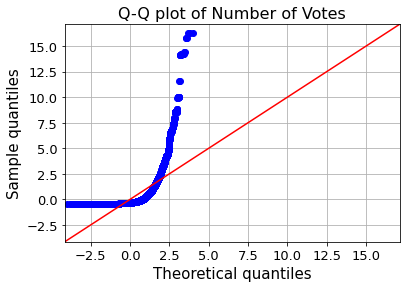

<Figure size 576x360 with 0 Axes>

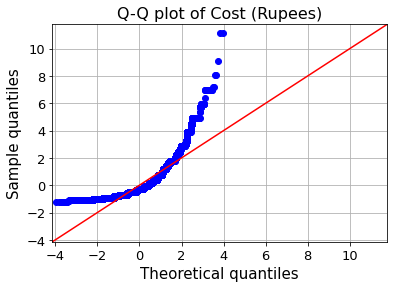

In [41]:
#checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot
data_norm=data[['Number of Votes', 'Cost (Rupees)']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()


1.	Looking at the Q-Q plot above, it appears that both numeric independent variables are not normally distributed
2.	The data looks right skewed with a few outliers for entries for the higher values


It is hard to visualize and read data as they are not in same ranges, I'll try to normalize the data for a better understanding and visualization. It will also help later to get normalized coeffiecients when building the Model.

# Data transforming, Feature creation and Analysis

**What are the likely distributions of the numeric variables?**

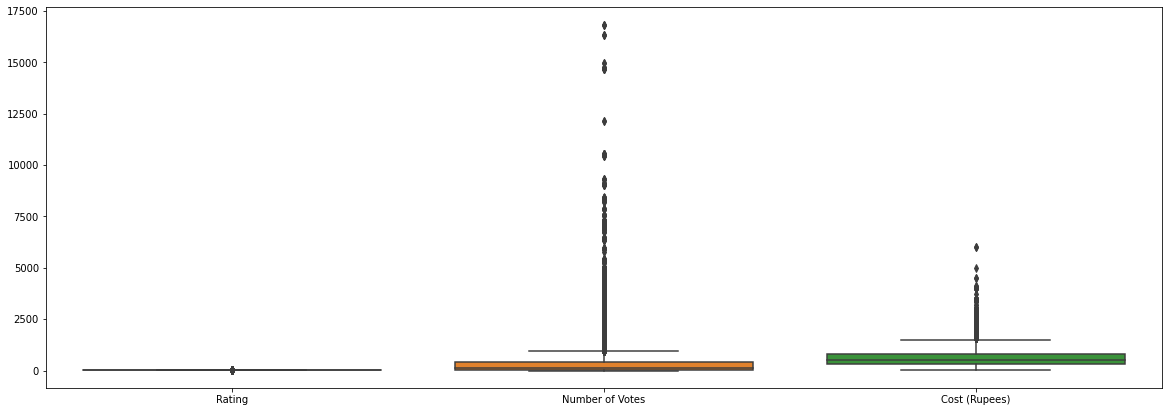

In [71]:
plt.figure(figsize=(20,7))
sns.boxplot(data=data)

In [ ]:
data = pd.get_dummies(data, columns=['Order Online?', 'Reservation Needed?', ])

# Normalizing the data in the rings column beacuse the value is too high when compared to other independent variable

from sklearn import preprocessing

# Create x to store scaled values as floats
x = data[['Rings']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
data[['Rings']] = pd.DataFrame(x_scaled)

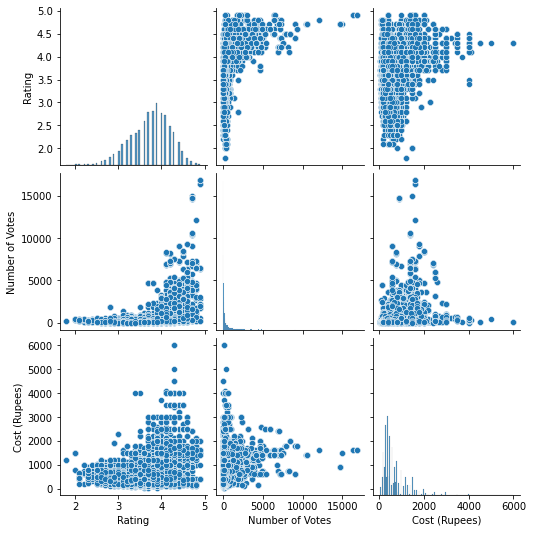

In [69]:
sns.pairplot(data)

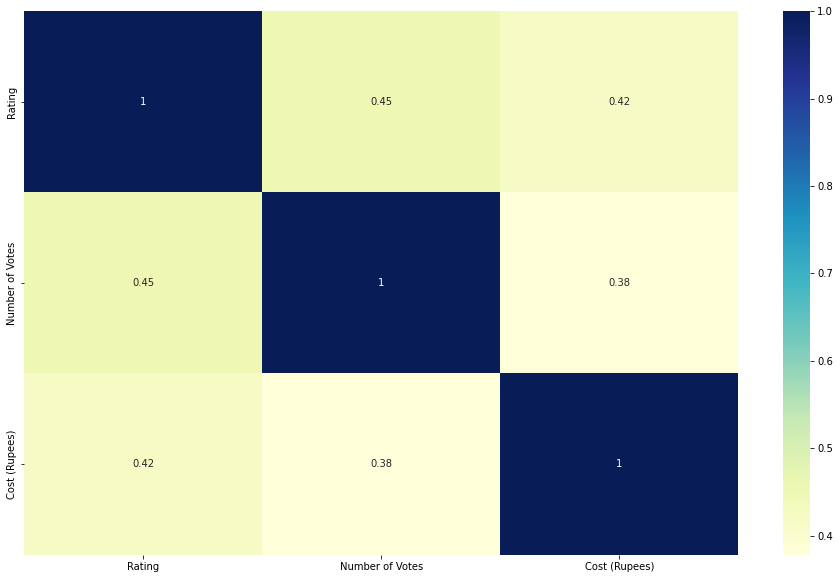

In [70]:
plt.figure(figsize = (16, 10))
corr=data.corr()
sns.heatmap(corr, annot = True, cmap="YlGnBu")
plt.show()

☹ The distributions of numeric values look skewed

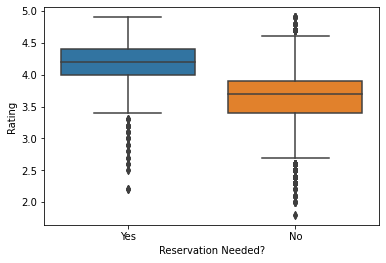

In [72]:
sns.boxplot(x='Reservation Needed?',y='Rating' , data = data) #,estimator=np.std)

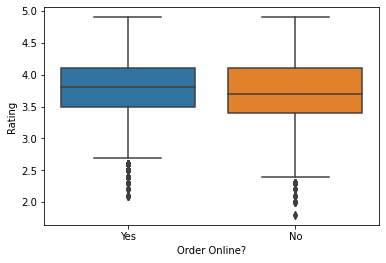

In [73]:
sns.boxplot(x='Order Online?',y='Rating' , data = data) #,estimator=np.std)

Requiring a reservation seems to have differing rating averages across results. We can further analyze the pairplots highlighting which values require reservations.

<Figure size 1152x720 with 0 Axes>

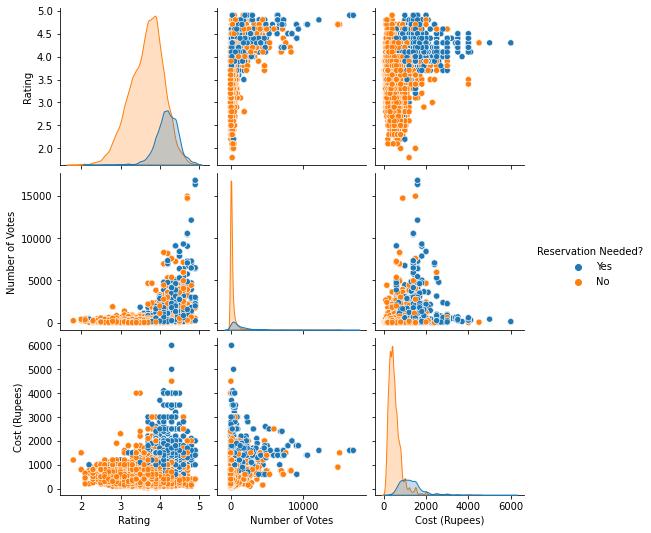

In [74]:
plt.figure(figsize=(16,10))
sns.pairplot(data=data, hue='Reservation Needed?')
plt.show()

Here we can see that restaurants with higher ratings of 4 stars and above tend to have more votes and also require reservations. Similarly, the more expensive a restaurant above 1000 rupees, the more likely the restaurant is rated higher and will need a reservation.

In [80]:
data.corr()

,Rating,Number of Votes,Cost (Rupees)
Rating,1.000000,0.451542,0.418289
Number of Votes,0.451542,1.000000,0.378134
Cost (Rupees),0.418289,0.378134,1.000000


In [79]:
data.describe(include='object').T

,count,unique,top,freq
Restaurant,26804,6574,Onesta,81
Order Online?,26804,2,Yes,17642
Reservation Needed?,26804,2,No,21628
City,26804,92,BTM,1719
Restaurant Type,26804,87,Quick Bites,8409
Cuisines,26804,2367,North Indian,1344
Meal Type,26804,7,Delivery,12046


In [76]:
top_cuisine = data.groupby('Cuisines')['Rating'].sum().sort_values(ascending=False)
top_cuisine.head(5)

Cuisines
North Indian             4883.3
North Indian, Chinese    3980.7
South Indian             2810.1
Bakery, Desserts         1507.5
Biryani                  1270.4
Name: Rating, dtype: float64

In [77]:
df_new = data[data['Cuisines'].isin(['North Indian', 'North Indian, Chinese', 'South Indian', 'Bakery, Desserts', 'Cafe'])]
df_new.head()

,Restaurant,Order Online?,Reservation Needed?,Rating,Number of Votes,City,Restaurant Type,Cuisines,Cost (Rupees),Meal Type
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,North Indian,600,Buffet
10,CafDown The Alley,Yes,No,4.1,402,Banashankari,Cafe,Cafe,500,Cafes
15,Cafe Vivacity,Yes,No,3.8,90,Banashankari,Cafe,Cafe,650,Cafes
24,Hide Out Cafe,No,No,3.7,31,Banashankari,Cafe,Cafe,300,Cafes
32,Sweet Truth,Yes,No,3.9,35,Banashankari,Delivery,"Bakery, Desserts",500,Delivery


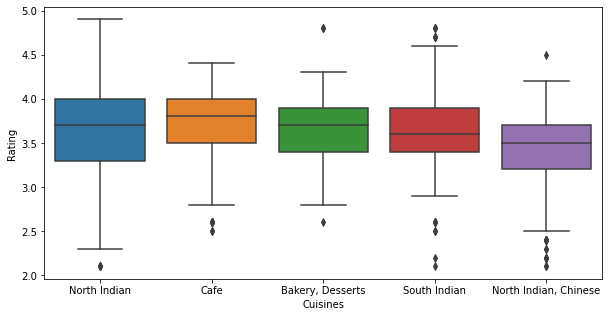

In [78]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Cuisines', y='Rating', data=df_new)
#plt.yscale('log')
plt.show()

In [ ]:
numerical_features   = data.select_dtypes(include = [np.number]).columns
categorical_features = data.select_dtypes(include= [np.object]).columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
categorical_features

Index(['Restaurant', 'Order Online?', 'Reservation Needed?', 'City',
       'Restaurant Type', 'Cuisines', 'Meal Type'],
      dtype='object')

In [ ]:
#Creating binary vaiables for Booking
data2 = pd.get_dummies(data)

# Normalizing the data in the rings column beacuse the value is too high when compared to other independent variable
from sklearn import preprocessing

# Create x to store scaled values as floats
x = data2[['Number of Votes']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
data2[['Number of Votes']] = pd.DataFrame(x_scaled)

# Create x to store scaled values as floats
y = data2[['Cost (Rupees)']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
y_scaled = min_max_scaler.fit_transform(y)

# Run the normalizer on the dataframe
data2[['Cost (Rupees)']] = pd.DataFrame(y_scaled)

# Create x to store scaled values as floats
z = data2[['Rating']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
z_scaled = min_max_scaler.fit_transform(z)

# Run the normalizer on the dataframe
data2[['Rating']] = pd.DataFrame(z_scaled)


In [ ]:
#data after nromalizing and feature creation
data2.head()

In [ ]:
data2.corr()

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(data2.corr(), annot=True, cmap='RdYlGn')

In [ ]:
sns.pairplot(data2)

Now it is clear to visualize and interpret the data. Looking at the boxplot above, we can infer below:

1. Height, whole weight, shucked weight, viscera weight has outliers meaning that few abalones survied and grew longer and heavier then expected
2. Few values in independent variables are very small and close to zero which makes sense as the Infant (or younger abalones) will have very small physical attributes
3. Sex have three categorical values - Male, Female and Infant and they are almost evenly distributed meaning almost same number of Male, Female and Infants
4. Most of the Ring values are between 6 and 15 meaning most of the abalones are taken for eating when they are between 7.5 and 16.5 years of age (age = number of rings + 1.5 years)
5. For other variables like height, length, diameter, whole weight (and other weigths) it looks like most of the values lies in between of the respective ranges of the variables, meaning most of the abalones grow untill 15 rings (abalone rings ranges from 1 to 29), this is same inference as observed in above point 


In [ ]:
#checking the correlation between all the features in the data
data.corr()

In [ ]:
#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

We can see there are lot of co-relation among the variables. The co-relation between length and diameter being the highest, it may mean that essentially both are measuring or predicting same thing

In [ ]:
#pair plot to check the colinearity
sns.pairplot(data) 

Correlation matrix and heatmap shows that there is multicollinearity between the independent variables. Heighest correlation is between Length and diameter.

# Identifing predictor significance

In [ ]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(data['Rings'], data[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight','Sex_I', 'Sex_M', 'Sex_F']]).fit()

# Print out the statistics
model.summary()

Considering the significance value of 0.05 because accuracy in predicting the age of the abalone is not that critical

1. The **length** has the p-value 0.8, which is greater and hence it is a non significant feature.
2. The **Diameter** has the p-value 0, which is lesser and hence it is a significant feature.
3. The **Height** has the p-value 0, which is lesser and hence it is a significant feature.
4. The **Whole weight** has the p-value 0, which is lesser and hence it is a significant feature.
5. The **Shucked weight** has the p-value 0, which is lesser and hence it is a significant feature.
6. The **Viscera weight** has the p-value 0, which is lesser and hence it is a significant feature.
7. The **Shell weight** has the p-value 0, which is lesser and hence it is a significant feature.
8. The **Sex_F** has the p-value 0, which is lesser and hence it is a significant feature.
9. The **Sex_I** has the p-value 0, which is lesser and hence it is a significant feature.
10. The **Sex_M** has the p-value 0, which is lesser and hence it is a significant feature.


# Building the Model

##Train ,Validation and Test split

In [ ]:
from sklearn.model_selection import  train_test_split

X = data[ ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Sex_F', 'Sex_I', 'Sex_M']]

y = data['Rings']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

In [ ]:
# Looking the data for test, training and validation set
X_test_plot = X_test[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight','Sex_I', 'Sex_M', 'Sex_F']]

X_val_plot = X_val[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight','Sex_I', 'Sex_M', 'Sex_F']]

X_train_plot = X_train[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight','Sex_I', 'Sex_M', 'Sex_F']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()
 

1. The division of dataset in Test, train and validation sets looks fine except few boundary values of Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight' which appears to be missing in test and validation sets
2. No missing values in 'Sex_I', 'Sex_M', 'Sex_F'

## Linear Regression

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)



## Making predictions

In [ ]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on tarining set =',r2)

In [ ]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)


In [ ]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2_val = r2_score(y_val,y_pred)
print('R^2 score on validation set =',r2_val)



## Understanding the important features

In [ ]:
#Understanding the important features 
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

The permutaion importance is also aligned with the P values where length seems to be the lease significant value and rest are significant Sex_M, Sex_F and Sex_I being the top three significant features

#Answer the following questions 

* Which independent variables are useful to predict a target (dependent variable)?
<br>A:
Below is the rank of the dependent variables
1. Sex_M
2. Sex_F
3. Sex_I
4. Shucked Weight 
5. Whole weight
6. Shell weight
7. Diameter
8. Viscera weight
9. Height
10. Length
<br>
* Which independent variables have missing data? How much?
<br>A:
No independent variables have any missing data or zeros.  

* Do the training and test sets have the same data?
<br>A:
Yes, most of the data are same in test, train and validation data set except the data points in training set are more and few boundary values are not included in train and validation data set. 

* In the predictor variables independent of all the other predictor variables?
<br>A:
No, they are not independet of each other. There is multi - collinearity among lot of the independent variable which is shown by the correlation table and pairplot map

* Which predictor variables are the most important?
<br>A:
1. Sex_M
2. Sex_F
3. Sex_I
4. Shucked Weight 
5. Whole weight
6. Shell weight
7. Diameter
8. Viscera weight
9. Height

* Do the ranges of the predictor variables make sense?
<br>A:
1. Height, whole weight, shucked weight, viscera weight has outliers meaning that few abalones survied and grew longer and heavier then expected
2. Few values in independent variables are very small and close to zero which makes sense as the Infant (or younger abalones) will have very small physical attributes
3. Sex have three categorical values - Male, Female and Infant and they are almost evenly distributed meaning almost same number of Male, Female and Infants
4. Most of the Ring values are between 6 and 15 meaning most of the abalones are taken for eating when they are between 7.5 and 16.5 years of age (age = number of rings + 1.5 years)
5. For other variables like height, length, diameter, whole weight (and other weigths) it looks like most of the values lies in between of the respective ranges of the variables, meaning most of the abalones grow untill 15 rings (abalone rings ranges from 1 to 29), this is same inference as observed in above point

* What are the distributions of the predictor variables? 
<br>A:
1. Looking at the Q-Q plots, it appears that all independednt variables are roughly following normal distribution
2. Sex is categorical value and have 3 different values namely Male, Female and Infant

# Conclusion

From the analysis done above on the data set, it is clear that there is multicolinearity and ecxpet length all other dependent variables are significant.



# Refernces

1. Sckit learn offcial documentation
2. Refered Towards Data Science
3. Eli5 official documentation 

The algorithms were referred directly from the **Sckit learn official documentation**. Visualization was referred from the  Machine Learning with scikit-learn Quick Start Guide and **Towards Data Science** (How do you check the quality of your regression model in Python?).  The remaining code was written independently. Feature importance reference is taken from **eli5 offical documnetation** 









Copyright 2021 AI Skunks


Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.